### Importing the Libraries

In [43]:
import numpy as np  # For using n-d array mathematical operations
import pandas as pd # For open csv files and create dataframe
import matplotlib.pyplot as plt # For plotting graphs

### Reading CSV Files and Checking the content in it

In [44]:
# Opening csv file
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'utf-8')
df = dataset.copy() # Copying the dataset dataframe in df in case anything goes wrong, we can start again
df.head(10) # Showing first 10 rows in df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


### Solution for given problem
To find out top 5 investors who funded most, we can use InvestorsName and StartupName column in the dataset and count the fundings for each investor.

Sequoia Capital 50
Accel Partners 48
Kalaari Capital 43
Indian Angel Network 40
Blume Ventures 36


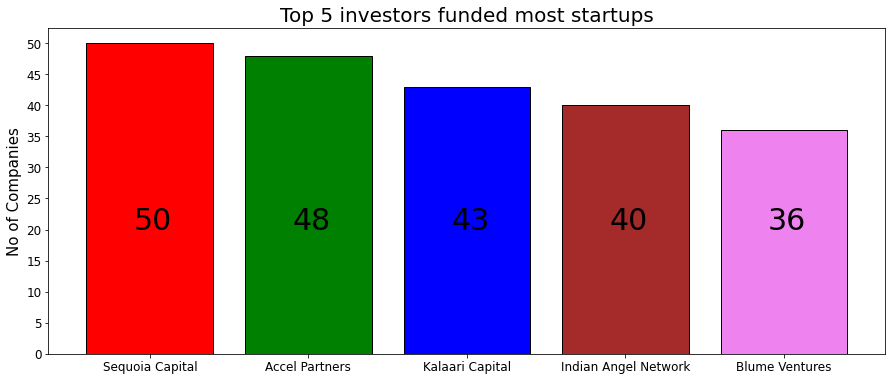

In [100]:
# Replacing nan values in the columns
df.InvestorsName.fillna('', inplace = True)
df.StartupName.fillna('', inplace = True)

# Replacing incorrect startup names with correct
df.StartupName.replace('Flipkart.com', 'Flipkart', inplace = True)
df.StartupName.replace('Ola Cabs', 'Ola', inplace = True)
df.StartupName.replace('Olacabs', 'Ola', inplace = True)
df.StartupName.replace('Oyo Rooms', 'Oyo', inplace = True)
df.StartupName.replace('OyoRooms', 'Oyo', inplace = True)
df.StartupName.replace('Paytm Marketplace', 'Paytm', inplace = True)

# Fetching Investor and company in which they invested
investorsName = df.InvestorsName
startupName = df.StartupName

investorsWithCount = {} # Fetching investors with total no of count invested
investorsWithStartup = {} # Fetching investors with startup in which they have invested

# Basically, investorsWithStartup will keep the record for each unique company funded by each investor
# as, investors as key and list of all the unique companies invested by them as values
# investorsWithCount keep the total no of unique companies funded by each investor
for index in range(len(investorsName)):
    investorsname = investorsName[index].split(', ')
    startup = startupName[index]
    for investors in investorsname:
        investor = investors.split(' and ')
        for invest in investor:
            inv = invest.split(',')
            for name in inv:
                if name != '':
                    if investorsWithStartup.get(name,None) is None:
                        investorsWithStartup[name] = [startup]
                        investorsWithCount[name] = 1
                    else:
                        if startup not in investorsWithStartup[name]:
                            investorsWithStartup[name].append(startup)
                            investorsWithCount[name] += 1

investors = list(investorsWithCount.keys()) # Fetching all the investors from investorsWithCount dictionary
count = list(investorsWithCount.values()) # Fetching count of unique companies funded by investor
investorsWithCount = list(zip(investors,count)) # Creating 2d array
investorsWithCount.sort(reverse = True, key = lambda x:x[1]) # Sorting as per count in descending order
investorsWithCount = np.array(investorsWithCount)
investors = investorsWithCount[:,0]
count = np.array(investorsWithCount[:,1], dtype = int)

# Printing top 5 investors who funded most companies
for index in range(5):
    print(investors[index], count[index])
    
# Plotting the Bar Graph
plt.figure(figsize = (15,6))
plt.bar(investors[:5], height = count[:5], color = ['red','green','blue','brown','violet'], edgecolor = 'black')
plt.xticks(rotation = 0, fontsize = 15)
plt.yticks(np.arange(0,55,5), fontsize = 12)
plt.title('Top 5 investors funded most startups', fontsize = 20)
plt.ylabel('No of Companies', fontsize = 15)
for index in range(5):
    plt.text(index-0.1,20,count[index],fontsize = 30)
plt.show()